In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names = lambda obj: print([name for name in dir(obj) if name[0] != "_"])

In [3]:
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")
flights = sns.load_dataset("flights")

# Pandas

### Funciones y mapeado

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [6]:
tips.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [7]:
tips.day.map({"Thur": "Thursday", "Fri": "Friday", "Sat": "Saturday", "Sun": "Sunday"})

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
         ...   
239    Saturday
240    Saturday
241    Saturday
242    Saturday
243    Thursday
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [8]:
tips.day = tips.day.map({"Thur": "Thursday", "Fri": "Friday", "Sat": "Saturday", "Sun": "Sunday"})

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sunday,Dinner,2
1,10.34,1.66,Male,No,Sunday,Dinner,3
2,21.01,3.50,Male,No,Sunday,Dinner,3
3,23.68,3.31,Male,No,Sunday,Dinner,2
4,24.59,3.61,Female,No,Sunday,Dinner,4


In [10]:
tips.total_bill.apply(np.square)

0      288.6601
1      106.9156
2      441.4201
3      560.7424
4      604.6681
         ...   
239    842.7409
240    738.7524
241    513.9289
242    317.5524
243    352.6884
Name: total_bill, Length: 244, dtype: float64

In [11]:
def addOne(n):
    return n + 1

In [12]:
tips.total_bill.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [13]:
tips.total_bill.apply(addOne).head()

0    17.99
1    11.34
2    22.01
3    24.68
4    25.59
Name: total_bill, dtype: float64

# Agrupaciones con estructuras Pandas

In [14]:
s = pd.Series([2, 4, 6, 5, 3], index = list("ABABC"))
s

A    2
B    4
A    6
B    5
C    3
dtype: int64

In [15]:
s.groupby(s.index)

In [16]:
s.groupby(s.index).sum()

A    8
B    9
C    3
dtype: int64

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sunday,Dinner,2
1,10.34,1.66,Male,No,Sunday,Dinner,3
2,21.01,3.50,Male,No,Sunday,Dinner,3
3,23.68,3.31,Male,No,Sunday,Dinner,2
4,24.59,3.61,Female,No,Sunday,Dinner,4


In [18]:
tips.groupby(by = "day", observed = False)

In [19]:
tips.groupby(by = "day", observed = False)["total_bill"].mean()

day
Thursday    17.682742
Friday      17.151579
Saturday    20.441379
Sunday      21.410000
Name: total_bill, dtype: float64

In [20]:
tips.groupby(by = ["day", "time"], observed = False)["total_bill"].mean()

day       time  
Thursday  Lunch     17.664754
          Dinner    18.780000
Friday    Lunch     12.845714
          Dinner    19.663333
Saturday  Lunch           NaN
          Dinner    20.441379
Sunday    Lunch           NaN
          Dinner    21.410000
Name: total_bill, dtype: float64

In [21]:
tips.groupby(by = ["day", "time"], observed = False)[["total_bill", "tip"]].mean()

total_bill       tip
day      time                        
Thursday Lunch    17.664754  2.767705
         Dinner   18.780000  3.000000
Friday   Lunch    12.845714  2.382857
         Dinner   19.663333  2.940000
Saturday Lunch          NaN       NaN
         Dinner   20.441379  2.993103
Sunday   Lunch          NaN       NaN
         Dinner   21.410000  3.255132

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sunday,Dinner,2
1,10.34,1.66,Male,No,Sunday,Dinner,3
2,21.01,3.50,Male,No,Sunday,Dinner,3
3,23.68,3.31,Male,No,Sunday,Dinner,2
4,24.59,3.61,Female,No,Sunday,Dinner,4


In [23]:
tips.pivot_table(index = "day", columns = "sex", values = "total_bill")

sex,Male,Female
day,,
Thursday,18.714667,16.715312
Friday,19.857000,14.145556
Saturday,20.802542,19.680357
Sunday,21.887241,19.872222


In [24]:
tips.pivot_table(index = ["day", "time"], columns = ["sex", "smoker"], values = "total_bill", aggfunc = "sum")

sex                Male          Female        
smoker              Yes      No     Yes      No
day      time                                  
Thursday Lunch   191.71  369.73  134.53  381.58
         Dinner    0.00    0.00    0.00   18.78
Friday   Lunch    34.16    0.00   39.78   15.98
         Dinner  129.46   34.95   48.80   22.75
Saturday Lunch     0.00    0.00    0.00    0.00
         Dinner  589.62  637.73  304.00  247.05
Sunday   Lunch     0.00    0.00    0.00    0.00
         Dinner  392.12  877.34   66.16  291.54

In [25]:
tips.set_index("sex").head()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,16.99,1.01,No,Sunday,Dinner,2
Male,10.34,1.66,No,Sunday,Dinner,3
Male,21.01,3.50,No,Sunday,Dinner,3
Male,23.68,3.31,No,Sunday,Dinner,2
Female,24.59,3.61,No,Sunday,Dinner,4


# Matplotlib

* Figura, que solo hay una y siempre existe
* Conjuntos de ejes dentro de la figura, y hay 0 o más
* Gráficas o trazas dentro de cada conjunto de ejes, y hay 0 o más

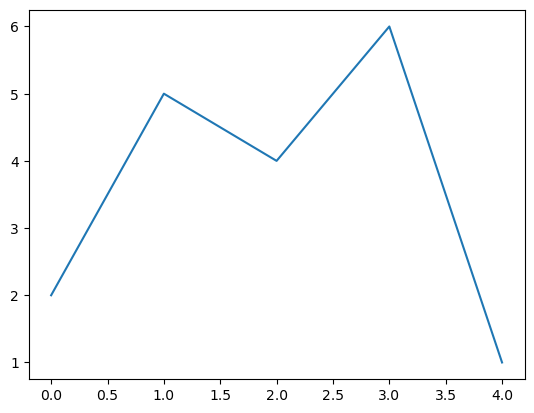

In [26]:
plt.plot([2, 5, 4, 6, 1])
plt.show()

#### Ruido blanco

In [27]:
generator = np.random.Generator(np.random.PCG64(seed = 0))

In [28]:
generator.integers(3, 8, size = 7)

array([7, 6, 5, 4, 4, 3, 3], dtype=int64)

In [29]:
a = generator.normal(0, 1, size = 50)

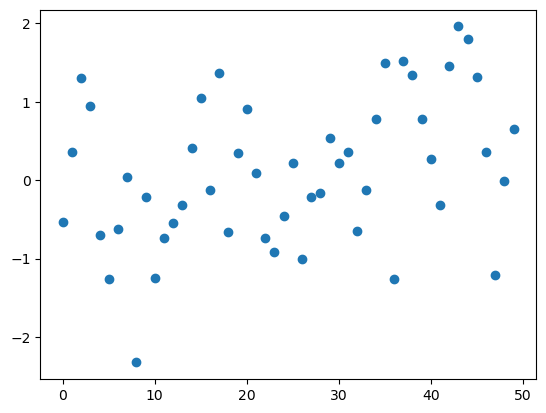

In [30]:
plt.scatter(range(len(a)), a)
plt.show()

#### Random walk

In [31]:
a = generator.normal(0, 1, size = 5)
a

array([-1.28836146,  0.39512206,  0.42986369,  0.69604272, -1.18411797])

In [32]:
a.cumsum()

array([-1.28836146, -0.8932394 , -0.46337571,  0.23266702, -0.95145095])

In [33]:
a = generator.normal(0, 1, size = 500).cumsum()
b = generator.normal(0, 1, size = 500).cumsum()

#### Interfaz funcional

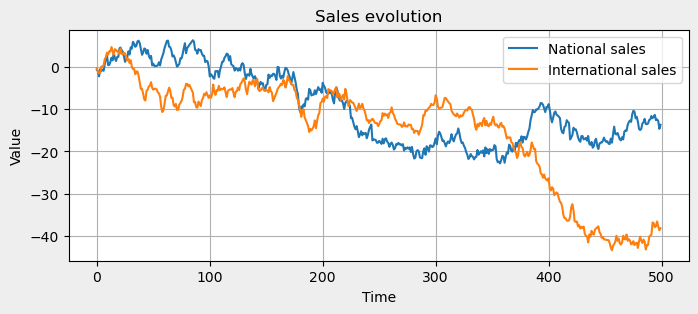

In [34]:
plt.figure(figsize = (8, 3), facecolor = "#EEEEEE")
plt.axes()
plt.plot(a, label = "National sales")
plt.plot(b, label = "International sales")
plt.title("Sales evolution")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()

#### Interfaz orientada a objetos

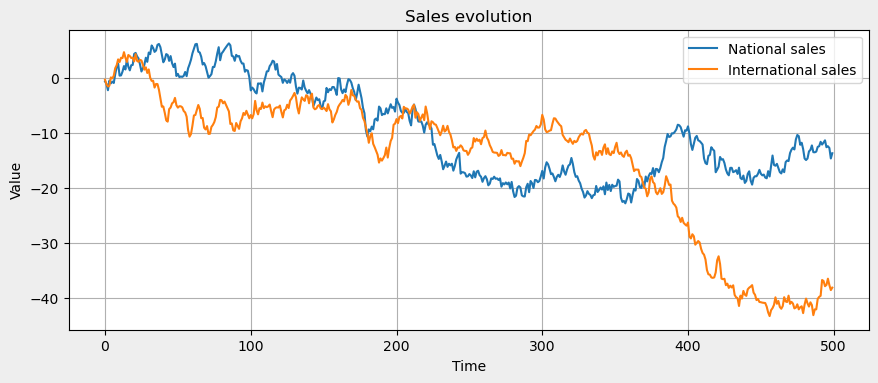

In [35]:
fig = plt.figure(figsize = (8, 3), facecolor = "#EEEEEE")
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(a, label = "National sales")
ax.plot(b, label = "International sales")
ax.set_title("Sales evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.grid()
ax.legend()
plt.show()

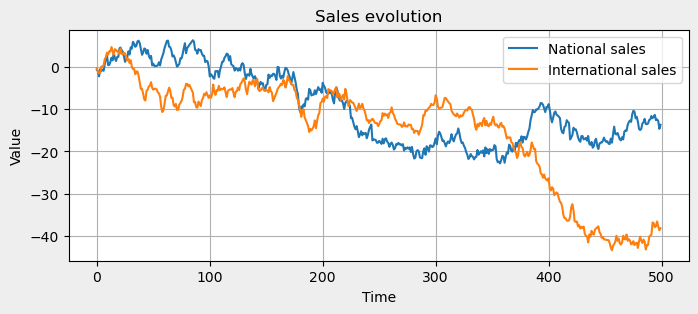

In [36]:
fig, ax = plt.subplots(figsize = (8, 3), facecolor = "#EEEEEE")
ax.plot(a, label = "National sales")
ax.plot(b, label = "International sales")
ax.set_title("Sales evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.grid()
ax.legend()
plt.show()

In [37]:
type(fig)

matplotlib.figure.Figure

In [38]:
type(ax)

matplotlib.axes._axes.Axes

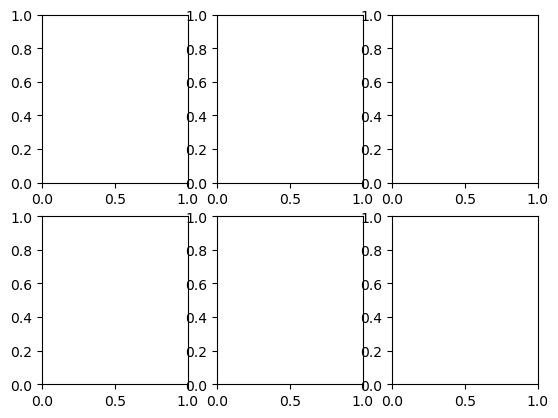

In [39]:
fig, ax = plt.subplots(2, 3)

In [40]:
type(ax)

numpy.ndarray

In [41]:
ax

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [42]:
ax[0, 1]

<Axes: >

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sunday,Dinner,2
1,10.34,1.66,Male,No,Sunday,Dinner,3
2,21.01,3.50,Male,No,Sunday,Dinner,3
3,23.68,3.31,Male,No,Sunday,Dinner,2
4,24.59,3.61,Female,No,Sunday,Dinner,4


In [44]:
meals_per_day = tips.day.value_counts()
meals_per_day

day
Saturday    87
Sunday      76
Thursday    62
Friday      19
Name: count, dtype: int64

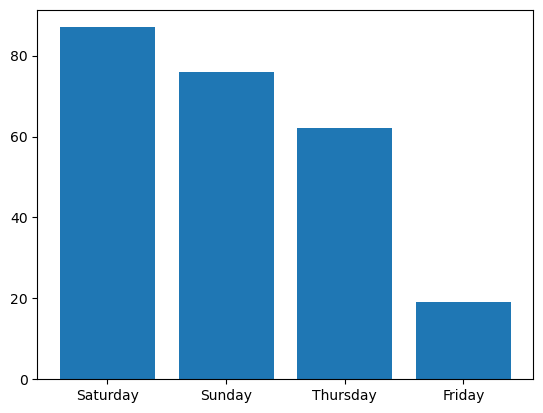

In [45]:
plt.bar(x = meals_per_day.index, height = meals_per_day)
plt.show()

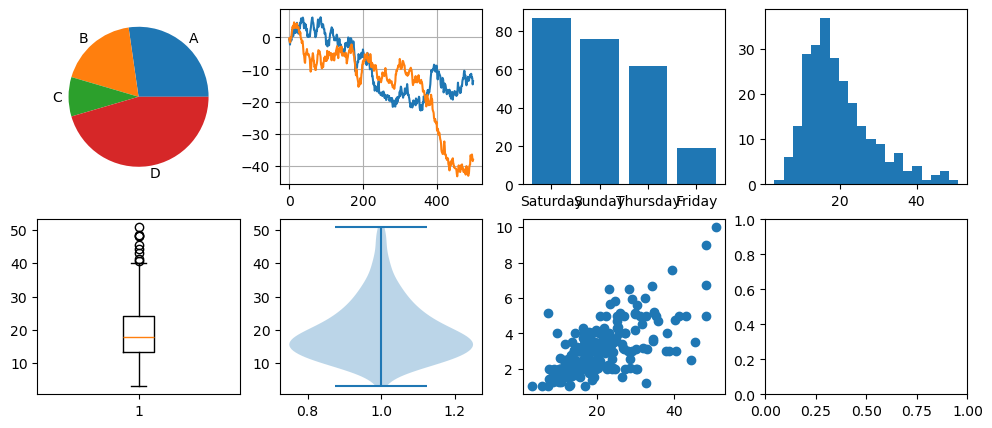

In [46]:
fig, ax = plt.subplots(2, 4, figsize = (12, 5))
ax[0, 0].pie([3, 2, 1, 5], labels = list("ABCD"))
ax[0, 1].plot(a)
ax[0, 1].plot(b)
ax[0, 1].grid()
ax[0, 2].bar(x = meals_per_day.index, height = meals_per_day)
ax[0, 3].hist(tips.total_bill, bins = 20)
ax[1, 0].boxplot(tips.total_bill)
ax[1, 1].violinplot(tips.total_bill)
ax[1, 2].scatter(x = tips.total_bill, y = tips.tip)
plt.show()

In [47]:
m = 2; n = 3

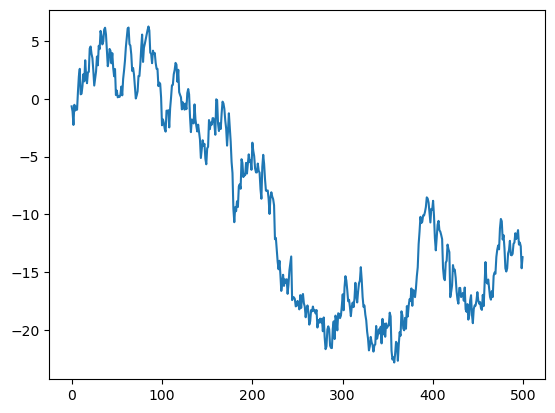

In [48]:
plt.plot(a);

# Seaborn

In [49]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sunday,Dinner,2
1,10.34,1.66,Male,No,Sunday,Dinner,3


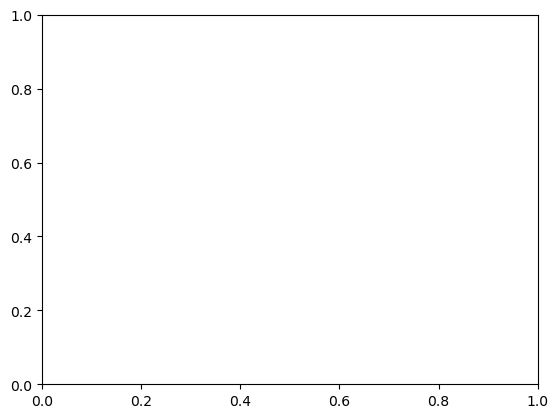

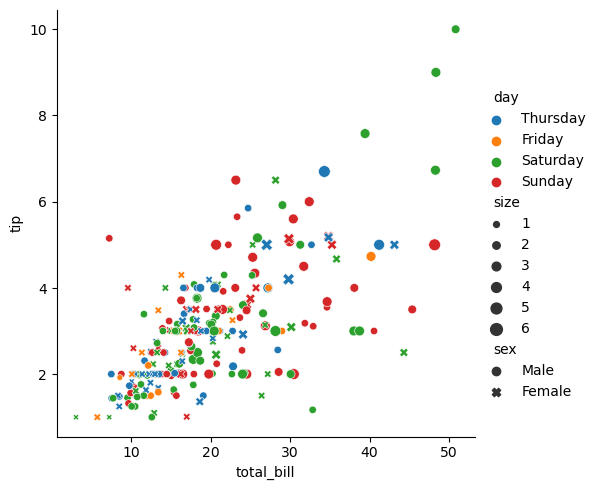

In [50]:
fig, ax = plt.subplots()
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "day", style = "sex", size = "size", kind = "scatter");

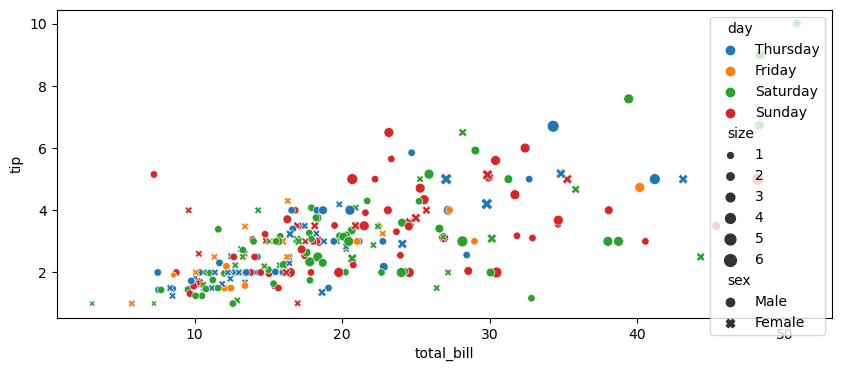

In [51]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.scatterplot(data = tips, x = "total_bill", y = "tip", hue = "day", style = "sex", size = "size");

In [52]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


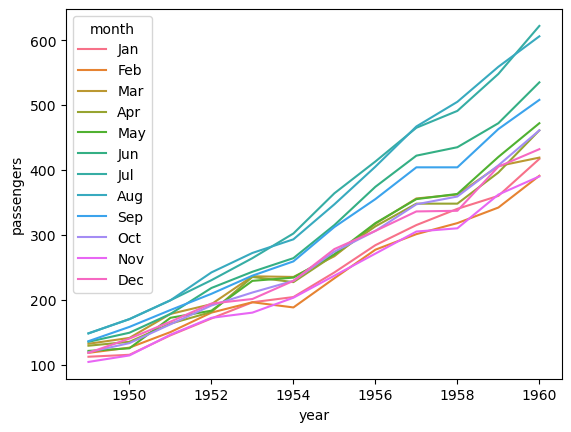

In [53]:
sns.lineplot(data = flights, x = "year", y = "passengers", hue = "month");

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


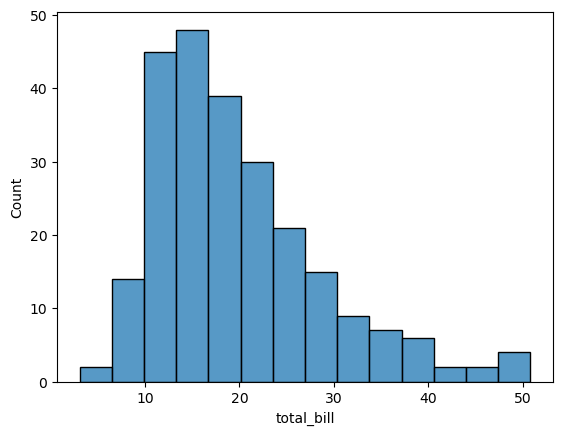

In [54]:
sns.histplot(data = tips, x = "total_bill");

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


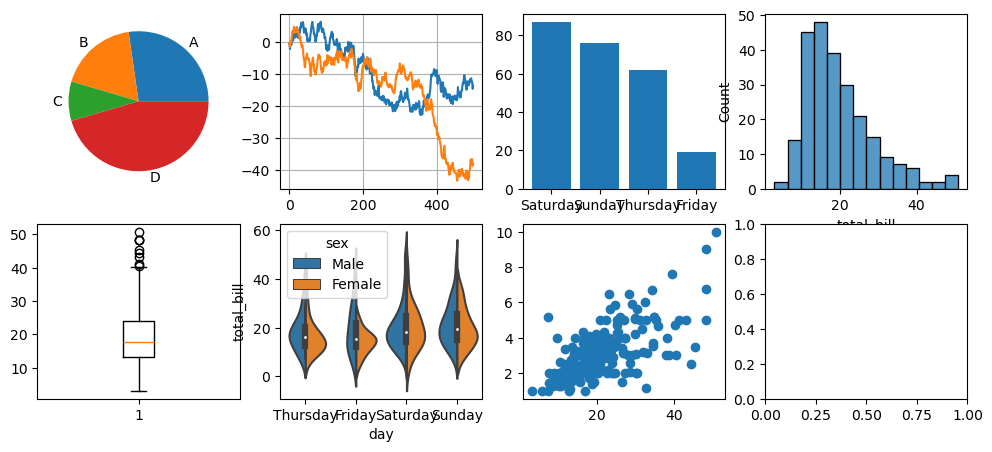

In [55]:
fig, ax = plt.subplots(2, 4, figsize = (12, 5))
ax[0, 0].pie([3, 2, 1, 5], labels = list("ABCD"))
ax[0, 1].plot(a)
ax[0, 1].plot(b)
ax[0, 1].grid()
ax[0, 2].bar(x = meals_per_day.index, height = meals_per_day)
sns.histplot(data = tips, x = "total_bill", ax = ax[0, 3])
ax[1, 0].boxplot(tips.total_bill)
sns.violinplot(data = tips, x = "day", y = "total_bill", hue = "sex", split = True, ax = ax[1, 1])
ax[1, 2].scatter(x = tips.total_bill, y = tips.tip)
plt.show()

### KDE = Kernel Density Estimator

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


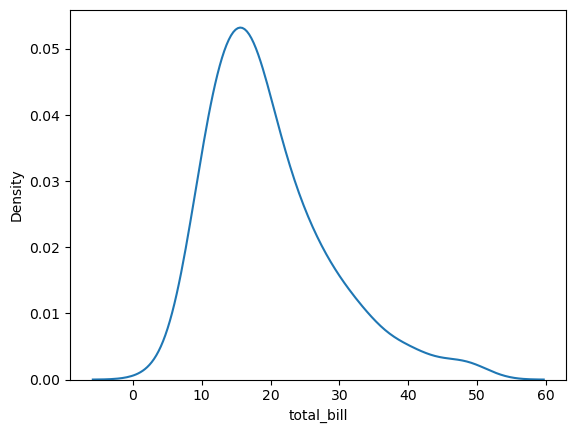

In [56]:
sns.kdeplot(data = tips, x = "total_bill");

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


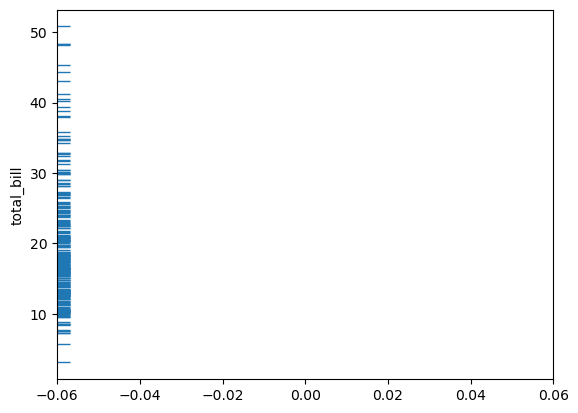

In [57]:
sns.rugplot(data = tips, y = "total_bill");

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


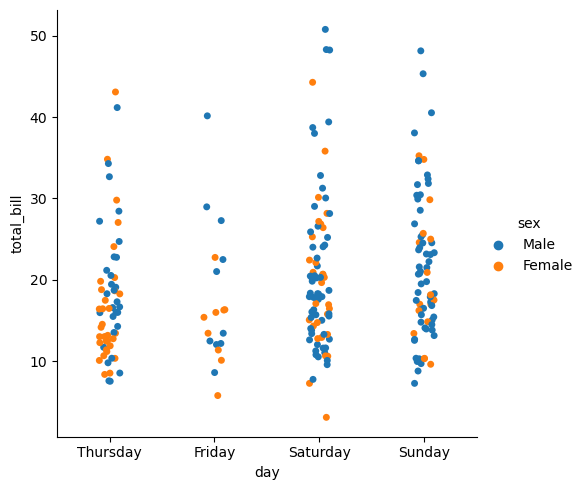

In [58]:
sns.catplot(data = tips, x = "day", y = "total_bill", hue = "sex", kind = "strip");

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


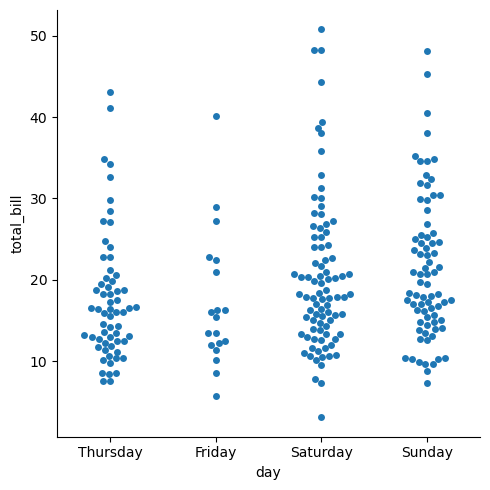

In [59]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "swarm");

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


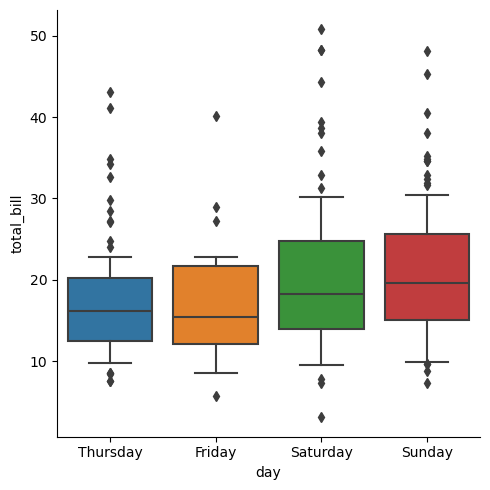

In [60]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "box", whis = 0.5);

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


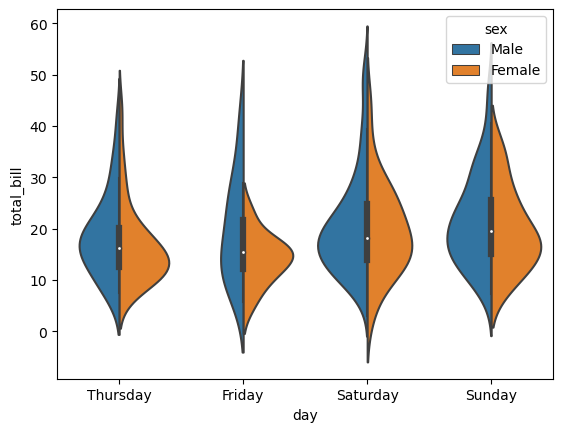

In [61]:
sns.violinplot(data = tips, x = "day", y = "total_bill", hue = "sex", split = True);